In [ ]:
import pandas as pd
df_train = pd.read_csv("/content/train_data.csv")
df_train.fillna(0,inplace=True)

In [ ]:
xtrain = df_train.drop("label",axis=1)
xtrain = xtrain.astype('float32')/255
ytrain = df_train["label"].values
list(set(ytrain))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [ ]:
xtrain

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313726,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17649,0.952941,0.984314,0.992157,0.941176,0.972549,0.984314,0.913725,0.949020,0.964706,0.921569,...,0.270588,0.552941,0.525490,0.254902,0.541176,0.517647,0.243137,0.521569,0.501961,0.227451
17650,0.043137,0.043137,0.043137,0.047059,0.047059,0.050980,0.050980,0.050980,0.050980,0.047059,...,0.443137,0.650980,0.588235,0.407843,0.584314,0.529412,0.352941,0.537255,0.490196,0.321569
17651,0.611765,0.643137,0.517647,0.592157,0.623529,0.509804,0.592157,0.619608,0.509804,0.592157,...,0.466667,0.600000,0.525490,0.470588,0.588235,0.513726,0.458824,0.560784,0.498039,0.439216
17652,0.384314,0.329412,0.262745,0.403922,0.337255,0.282353,0.403922,0.349020,0.301961,0.372549,...,0.082353,0.172549,0.074510,0.082353,0.137255,0.094118,0.090196,0.250980,0.247059,0.219608


In [ ]:
df_test = pd.read_csv("/content/test_data.csv")
xtest = df_test.drop("label",axis=1)
xtest = xtest.astype('float32')/255
ytest = df_test["label"].values
xtest.shape

(10000, 3072)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(128,input_shape=(784,),activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
model.summary()
# h = model.fit(xtrain,ytrain,epochs=11,validation_data=(xtest,ytest))

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 512)               1573376   
                                                                 
 dense_121 (Dense)           (None, 128)               65664     
                                                                 
 dropout_32 (Dropout)        (None, 128)               0         
                                                                 
 dense_122 (Dense)           (None, 64)                8256      
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_123 (Dense)           (None, 32)                2080      
                                                                 
 dropout_34 (Dropout)        (None, 32)              

In [ ]:
h = model.fit(xtrain,ytrain,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
442/442 [==============================] - 8s 17ms/step - loss: 2.1772 - accuracy: 0.1649 - val_loss: 2.1256 - val_accuracy: 0.1875
Epoch 2/100
442/442 [==============================] - 7s 16ms/step - loss: 2.0622 - accuracy: 0.2188 - val_loss: 2.2471 - val_accuracy: 0.1716
Epoch 3/100
442/442 [==============================] - 7s 17ms/step - loss: 1.9800 - accuracy: 0.2646 - val_loss: 1.9520 - val_accuracy: 0.2767
Epoch 4/100
442/442 [==============================] - 6s 13ms/step - loss: 1.9331 - accuracy: 0.2843 - val_loss: 1.9477 - val_accuracy: 0.2637
Epoch 5/100
442/442 [==============================] - 7s 16ms/step - loss: 1.8933 - accuracy: 0.3071 - val_loss: 1.9793 - val_accuracy: 0.2815
Epoch 6/100
442/442 [==============================] - 6s 13ms/step - loss: 1.8618 - accuracy: 0.3191 - val_loss: 1.8578 - val_accuracy: 0.3421
Epoch 7/100
442/442 [==============================] - 7s 15ms/step - loss: 1.8226 - accuracy: 0.3404 - val_loss: 1.9364 - val_accuracy:

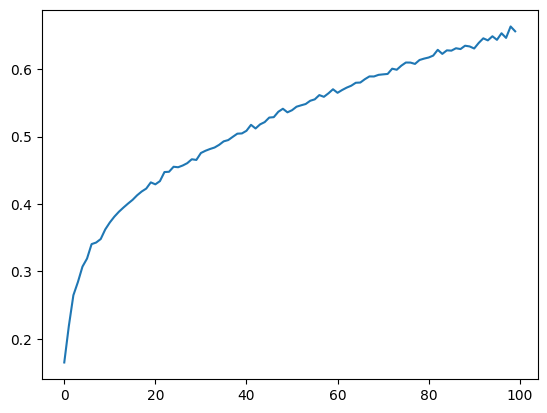

In [ ]:


import matplotlib.pyplot as plt
plt.plot(h.history["accuracy"])



In [ ]:
tl,ta = model.evaluate(xtest,ytest)
ta

313/313 [==============================] - 2s 6ms/step - loss: 1.8831 - accuracy: 0.4518


0.45179998874664307

In [ ]:
tl

1.8830779790878296

In [ ]:
import numpy as np
# plt.imshow(xtest.values.reshape()[6],cmap="Greys")
yp = model.predict(xtest)
va = np.argmax(yp[6])
print(va,ytest[6])

TypeError: ignored